In [3]:
# sympy_intro.py
"""Python Essentials: Introduction to SymPy.
Nathan Schill
Section 2
Tues. Jan. 24, 2023
"""
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

rat = sy.Rational

In [3]:
# Problem 1
def prob1():
    """Return an expression for

        (2/5)e^(x^2 - y)cosh(x+y) + (3/7)log(xy + 1).

    Make sure that the fractions remain symbolic.
    """
    
    # Get symbols
    x, y = sy.symbols('x y')

    # Return expression
    return rat(2,5)*sy.exp(x**2 - y)*sy.cosh(x+y) + rat(3,7)*sy.log(x*y + 1)

prob1()

2*exp(x**2 - y)*cosh(x + y)/5 + 3*log(x*y + 1)/7

In [4]:
# Problem 2
def prob2():
    """Compute and simplify the following expression.

        product_(i=1 to 5)[ sum_(j=i to 5)[j(sin(x) + cos(x))] ]
    """

    # Get symbols
    x, i, j = sy.symbols('x i j')

    # Create expression
    expr = sy.product(
        sy.summation(
            j*(sy.sin(x) + sy.cos(x)),
            (j,i,5)),
        (i,1,5)
    )

    # Simplify and return
    return sy.simplify(expr)

prob2()

453600*sqrt(2)*sin(x + pi/4)**5

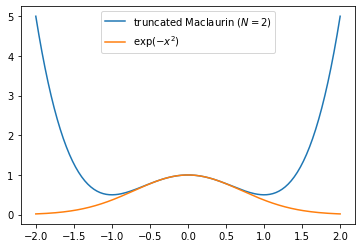

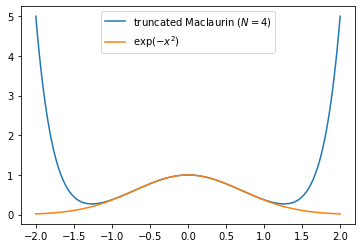

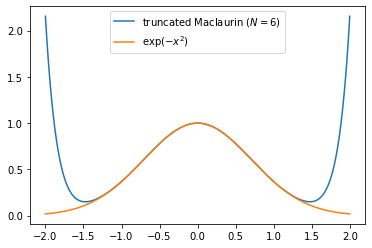

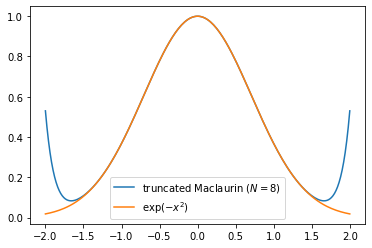

[None, None, None, None]

In [5]:
# Problem 3
def prob3(N):
    """Define an expression for the Maclaurin series of e^x up to order N.
    Substitute in -y^2 for x to get a truncated Maclaurin series of e^(-y^2).
    Lambdify the resulting expression and plot the series on the domain
    y in [-2,2]. Plot e^(-y^2) over the same domain for comparison.
    """

    # Get symbols
    x, y, n = sy.symbols('x y n')

    # Define truncated Maclaurin for exp(-x^2)
    expr = sy.summation(x**n/sy.factorial(n), (n,0,N))

    # Create function of expr, substituting -y^2 for x
    f = sy.lambdify(y, expr.subs(x, -y**2), 'numpy')

    # Get domain
    domain = np.linspace(-2, 2, 200)

    # Plot exp(-x^2) and f
    plt.plot(domain, f(domain), label=f'truncated Maclaurin ($N={N}$)')
    plt.plot(domain, np.exp(-domain**2), label=f'$\exp(-x^{2})$')
    
    # Legend and show
    plt.legend()
    plt.show()

[prob3(n) for n in (2, 4, 6, 8)]


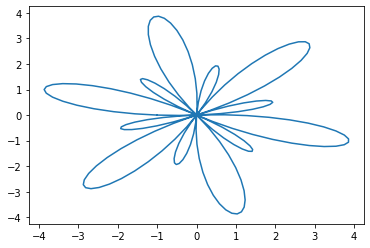

In [7]:
def prob4():
    """The following equation represents a rose curve in cartesian coordinates.

    0 = 1 - [(x^2 + y^2)^(7/2) + 18x^5 y - 60x^3 y^3 + 18x y^5] / (x^2 + y^2)^3

    Construct an expression for the nonzero side of the equation and convert
    it to polar coordinates. Simplify the result, then solve it for r.
    Lambdify a solution and use it to plot x against y for theta in [0, 2pi].
    """

    def fun():
        # Get symbols
        x, y, r, t = sy.symbols('x y r t')
        
        # Expression for right side of above equation
        expr = 1 - ( 
            (x**2 + y**2)**rat(7,2) + 18*(x**5)*y - 60*(x**3)*(y**3) + 18*x*(y**5)
        )/(x**2 + y**2)**3

        # Sub x = r*cos(t), y = r*sin(t)
        sub = expr.subs({x:r*sy.cos(t), y:r*sy.sin(t)}).simplify()

        # Solve for r, get the second expression, and lambdify with respect to t
        return sy.lambdify(t, sy.solve(sub, r)[1], 'numpy')
    
    # Get r(t)
    rrr = fun()

    # Plot over [0, 2*pi] using r(t)*cos(t), y = r(t)*sin(t)
    domain = np.linspace(0, 2*np.pi, 200)
    plt.plot(rrr(domain)*np.cos(domain), rrr(domain)*np.sin(domain))
    plt.show()

prob4()


In [76]:
# Problem 5
def prob5():
    """Calculate the eigenvalues and eigenvectors of the following matrix.

            [x-y,   x,   0]
        A = [  x, x-y,   x]
            [  0,   x, x-y]

    Returns:
        (dict): a dictionary mapping eigenvalues (as expressions) to the
            corresponding eigenvectors (as SymPy matrices).
    """
    # Define symbols and matrix
    x, y, z, l, a, b, c = sy.symbols('x y z l a:c')
    A = sy.Matrix([[x-y, x, 0],
                  [x, x-y, x],
                  [0, x, x-y]])
    
    # Get characteristic polynomial
    char_poly = sy.det(A - l*sy.eye(3))

    # Solve char_poly = 0 for l i.e. eigenvalues
    eigsys = {eval : None for eval in sy.solve(char_poly, l)}

    # Create augmented matrix
    aug_mat = (A - l*sy.eye(3)).row_join(sy.zeros(3,1))
    
    # Solve for eigenvector of each eigenvalue
    eigenvects = [None] * 3
    for eval in eigsys:
        # Solve for the eigenvector of each eigenvalue
        eigsys[eval] = (A - l*sy.eye(3)).subs(l, eval).nullspace()
        
    return eigsys

prob5()

{x - y: [Matrix([
  [-1],
  [ 0],
  [ 1]])],
 x + sqrt(2)*x - y: [Matrix([
  [      1],
  [sqrt(2)],
  [      1]])],
 -sqrt(2)*x + x - y: [Matrix([
  [       1],
  [-sqrt(2)],
  [       1]])]}

In [130]:
# Define symbols and matrix
x, y = sy.symbols('x y')
A = sy.Matrix([[x-y, x, 0],
               [x, x-y, x],
               [0, x, x-y]])

print('Verify Av = lv for each l,v pair')
eigsys = prob5()
for val, vec_list in eigsys.items():
    vec = vec_list[0]

    print('l =', val)
    print('Av =', sy.simplify(A*vec))
    print('lv =', sy.simplify(val*vec), '\n')
print('These are the same but sy.simplify doesn\'t give the same result.\n')

print('Compare against SymPy\'s eigenvals and eigenvects methods.')
print('My solution')
print(eigsys, '\n')

print('SymPy\'s eigenvals')
print(A.eigenvals(), '\n')

print('SymPy\'s eigenvects')
sy_eigsys = A.eigenvects()
for i in range(len(sy_eigsys)):
    sy_eigsys[i][2][0] = sy.expand(sy_eigsys[i][2][0])
print(sy_eigsys)

Verify Av = lv for each l,v pair
l = x - y
Av = Matrix([[-x + y], [0], [x - y]])
lv = Matrix([[-x + y], [0], [x - y]]) 

l = x + sqrt(2)*x - y
Av = Matrix([[x + sqrt(2)*x - y], [2*x + sqrt(2)*(x - y)], [x + sqrt(2)*x - y]])
lv = Matrix([[x + sqrt(2)*x - y], [sqrt(2)*(x + sqrt(2)*x - y)], [x + sqrt(2)*x - y]]) 

l = -sqrt(2)*x + x - y
Av = Matrix([[-sqrt(2)*x + x - y], [2*x + sqrt(2)*(-x + y)], [-sqrt(2)*x + x - y]])
lv = Matrix([[-sqrt(2)*x + x - y], [sqrt(2)*(-x + sqrt(2)*x + y)], [-sqrt(2)*x + x - y]]) 

These are the same but sy.simplify doesn't give the same result.

Compare against SymPy's eigenvals and eigenvects methods.
My solution
{x - y: [Matrix([
[-1],
[ 0],
[ 1]])], x + sqrt(2)*x - y: [Matrix([
[      1],
[sqrt(2)],
[      1]])], -sqrt(2)*x + x - y: [Matrix([
[       1],
[-sqrt(2)],
[       1]])]} 

SymPy's eigenvals
{x - y: 1, -sqrt(2)*x + x - y: 1, x + sqrt(2)*x - y: 1} 

SymPy's eigenvects
[(x - y, 1, [Matrix([
[-1],
[ 0],
[ 1]])]), (x + sqrt(2)*x - y, 1, [Matrix([
[    

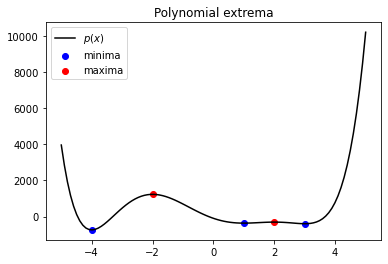

({-4, 1, 3}, {-2, 2})

In [186]:
# Problem 6
def prob6():
    """Consider the following polynomial.

        p(x) = 2*x^6 - 51*x^4 + 48*x^3 + 312*x^2 - 576*x - 100

    Plot the polynomial and its critical points over [-5,5]. Determine which
    points are maxima and which are minima. Plot the maxima in one color and the
    minima in another color. Return the minima and maxima (x values) as two
    separate sets.

    Returns:
        (set): the local minima.
        (set): the local maxima.
    """
    # Define x, p(x)
    x = sy.symbols('x')
    p = 2*x**6 - 51*x**4 + 48*x**3 + 312*x**2 - 576*x - 100
    px = sy.lambdify(x, p)

    # Obtain p' and p''
    pp = sy.diff(p, x)
    ppp = sy.diff(p, x, x)

    # Find critical points of p by solving for pp(x) = 0
    crit_pts = sy.solve(pp)

    # Create sets of local minima and maxima
    is_minimum = [ppp.subs(x, pt) > 0 for pt in crit_pts]
    minima = np.array([pt for is_min, pt in zip(is_minimum, crit_pts) if is_min])
    maxima = np.array([pt for is_min, pt in zip(is_minimum, crit_pts) if not is_min])

    # Plot p and extrema
    domain = np.linspace(-5, 5, 100)
    plt.plot(domain, px(domain), label='$p(x)$', c='k')
    plt.scatter(minima, px(minima), label='minima', c='b')
    plt.scatter(maxima, px(maxima), label='maxima', c='r')
    
    # Legend, title, show
    plt.legend()
    plt.title('Polynomial extrema')
    plt.show()

    return set(minima), set(maxima)

prob6()


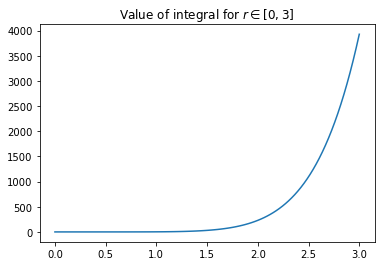

229.78506266256773

In [249]:
# Problem 7
def prob7():
    """Calculate the volume integral of f(x,y,z) = (x^2 + y^2 + z^2)^2 over the
    sphere of radius r. Lambdify the resulting expression and plot the integral
    value for r in [0,3]. Return the value of the integral when r = 2.

    Returns:
        (float): the integral of f over the sphere of radius 2.
    """
    # Define symbols
    x,y,z, r, rho, theta, phi = sy.symbols('x:z r rho theta phi')

    # Define h
    h = sy.Matrix([rho*sy.sin(phi)*sy.cos(theta), rho*sy.sin(phi)*sy.sin(theta), rho*sy.cos(phi)])

    # Get Jacobian of h
    J = h.jacobian([rho, theta, phi])
    detJ = sy.simplify(J.det())
    
    # Define f
    f = (x**2 + y**2 + z**2)**2

    # Replace x,y,z with h1,h2,h3 in f and simplify
    f_subbed = sy.simplify(f.subs({u:v for u,v in zip((x,y,z), h)}))
    
    # Get integrand
    integrand = f_subbed * -detJ

    # Calculated integral
    integral = sy.integrate(integrand, (rho, 0, r), (theta, 0, 2*sy.pi), (phi, 0, sy.pi))

    # Lambdify integral
    lam_int = sy.lambdify(r, integral)

    # Plot
    domain = np.linspace(0, 3, 100)
    plt.plot(domain, lam_int(domain))
    plt.title('Value of integral for $r \in [0,3]$')
    plt.show()
    
    return lam_int(2)

prob7()
